In [21]:

#Create imports for modules
import fxcmpy
import pandas as pd
import numpy as np
import datetime as dt

#import funcs
from pyti.bollinger_bands import upper_bollinger_band as ubb
from pyti.bollinger_bands import middle_bollinger_band as mbb
from pyti.bollinger_bands import lower_bollinger_band as lbb
from pyti.bollinger_bands import percent_bandwidth as percent_b
from pyti.relative_strength_index import relative_strength_index as rsi
from pyti.simple_moving_average import simple_moving_average as sma

#import plots and styling
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [22]:
#Establish connection using python-wrapper and config file
socket = fxcmpy.fxcmpy(config_file = 'fxcm.cfg')
socket.connect
#print (socket.get_instruments_for_candles())

<bound method fxcmpy.connect of <fxcmpy.fxcmpy.fxcmpy object at 0x000002BEAB0B8B38>>

In [54]:
minute = dt.datetime.now().minute
hour= dt.datetime.now().hour
day = dt.datetime.now().day
month = dt.datetime.now().month
year = dt.datetime.now().year
start1 = dt.datetime(year, month, day-1 , 0,0,0)
end1 = dt.datetime(year, month, day , hour ,minute -1 ,10)
data = socket.get_candles(instrument = 'GBP/USD', period = 'm5', start =start1 , end =end1 )
#data = socket.get_candles(instrument = 'EUR/GBP', period = 'm1')EUR    

In [55]:
end1

datetime.datetime(2019, 10, 14, 14, 54, 10)

In [56]:
start1

datetime.datetime(2019, 10, 13, 0, 0)

In [57]:
data


,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2019-10-14 00:35:00,1.26004,1.26007,1.26031,1.26004,1.26014,1.26013,1.26037,1.26008,506
2019-10-14 00:40:00,1.26007,1.26028,1.26038,1.26006,1.26013,1.26037,1.26043,1.26011,1158
2019-10-14 00:45:00,1.26028,1.26016,1.26040,1.26001,1.26036,1.26023,1.26045,1.26005,676
2019-10-14 00:50:00,1.26017,1.26047,1.26063,1.26014,1.26024,1.26052,1.26065,1.26018,1015
2019-10-14 00:55:00,1.26047,1.26064,1.26085,1.26040,1.26052,1.26066,1.26088,1.26047,1097
2019-10-14 01:00:00,1.26064,1.26073,1.26079,1.26046,1.26066,1.26078,1.26083,1.26050,1009
2019-10-14 01:05:00,1.26072,1.26039,1.26077,1.26035,1.26077,1.26046,1.26083,1.26040,555
2019-10-14 01:10:00,1.26040,1.25953,1.26043,1.25953,1.26047,1.25959,1.26050,1.25957,1323
2019-10-14 01:15:00,1.25953,1.25926,1.25979,1.25922,1.25959,1.25933,1.25986,1.25923,1625


In [20]:
#Define useful variables
data['upper_band'] = ubb(data['askclose'], period = 20)
data['mid_band'] = mbb(data['askclose'], period = 20 )
data['lower_band'] = lbb(data['askclose'], period = 20 )
data['percent_b'] = percent_b(data['askclose'], period =20)
data['tradebuy1'] = np.where(((data['askclose'] > data['askopen'])  ),1,0)
data['tradebuy2'] = np.where((  (data['mid_band'] < data['askclose'])  ),1,0)
data['tradebuy3'] = np.where(( (data['percent_b'] > 0.3) ),1,0)
data['tradebuy'] = np.where(( (data['tradebuy1'] * data['tradebuy2'] * data['tradebuy3']  > 0) ),'1',0)
data['tradesell1'] = np.where(((data['askclose'] < data['askopen'])  ),1,0)
data['tradesell2'] = np.where((  (data['mid_band'] > data['askclose'])  ),1,0)
data['tradesell3'] = np.where(( (data['percent_b'] > 0.3) ),1,0)
data['tradesell'] = np.where(( (data['tradesell1'] * data['tradesell2'] * data['tradesell3']  > 0) ),'1',0)


Exception: Error: data_len < period

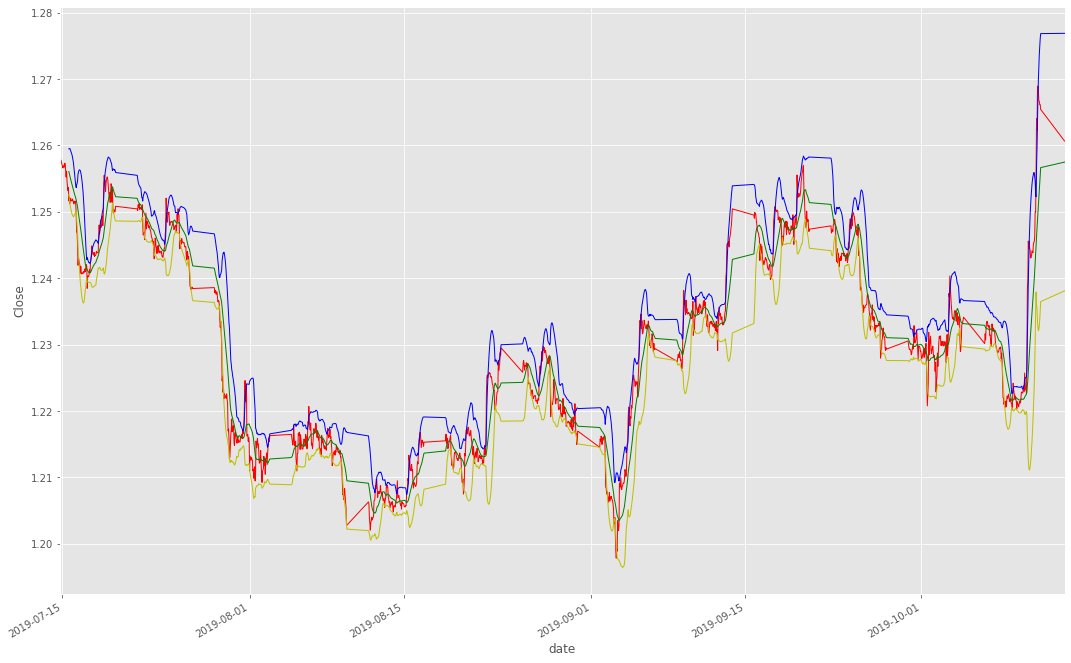

In [5]:
fig = plt.figure(figsize=(18,12))

ax1 = fig.add_subplot(111,  xlabel = 'Date',ylabel='Close')

data['askclose'].plot(ax=ax1, color='r', lw=1)
data['upper_band'].plot(ax=ax1, color = 'b', lw= 1)
data['mid_band'].plot(ax=ax1, color = 'g', lw= 1)
data['lower_band'].plot(ax=ax1, color = 'y', lw= 1)


In [6]:
data

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,upper_band,mid_band,lower_band,percent_b,tradebuy1,tradebuy2,tradebuy3,tradebuy,tradesell1,tradesell2,tradesell3,tradesell
date,,,,,,,,,,,,,,,,,,,,,
2019-07-14 19:00:00,1.25725,1.25749,1.25755,1.25603,1.25801,1.25774,1.25782,1.25728,16,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0,0
2019-07-14 20:00:00,1.25749,1.25712,1.25750,1.25671,1.25774,1.25784,1.25788,1.25767,26,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0
2019-07-14 21:00:00,1.25712,1.25698,1.25753,1.25580,1.25784,1.25773,1.25801,1.25654,5905,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0,0
2019-07-14 22:00:00,1.25698,1.25739,1.25778,1.25698,1.25773,1.25745,1.25787,1.25736,2104,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0,0
2019-07-14 23:00:00,1.25739,1.25710,1.25739,1.25689,1.25745,1.25715,1.25745,1.25695,2755,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0,0
2019-07-15 00:00:00,1.25710,1.25687,1.25725,1.25665,1.25715,1.25689,1.25729,1.25670,2788,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0,0
2019-07-15 01:00:00,1.25687,1.25656,1.25689,1.25588,1.25689,1.25660,1.25689,1.25591,4785,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0,0
2019-07-15 02:00:00,1.25656,1.25680,1.25690,1.25588,1.25660,1.25685,1.25691,1.25590,5531,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0
2019-07-15 03:00:00,1.25680,1.25692,1.25697,1.25617,1.25685,1.25695,1.25699,1.25620,4262,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0


In [72]:
def myaction():
    buy_prices = []
    sell_prices = []
    order = False
    for i, row in data.iterrows():
        #print(row['tradebuy'])
        #buy
        if row['tradebuy'] == '1' and order == False:
            print("Create buy order since tradebuy = 1 ")
            print("Price bought: " +str(float(row['askopen'])) )
            buy_prices.append(float(row['askopen']))
            order = True
        # close buy order
        if row['tradesell'] == '1' and order == True:
            print("Create sell order tradesell == 1")
            print("Price sold: " +str(float(row['askopen'])))
            sell_prices.append(float(row['askopen']))
            order = False

            #,str(float(row['date'])),str(float(row['date']))
    

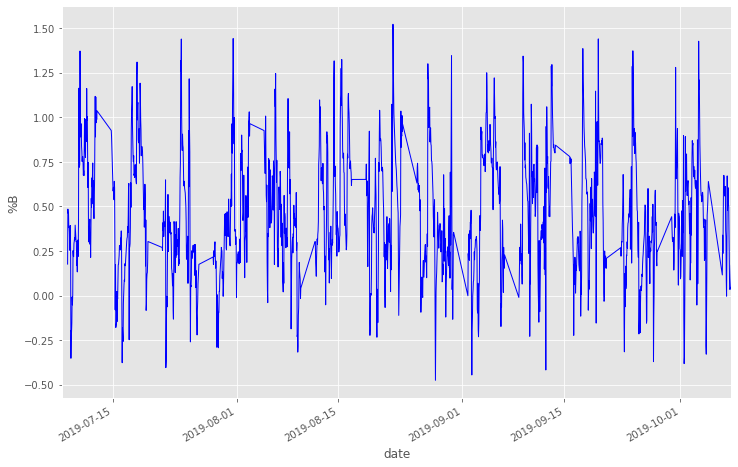

In [73]:
band_fig = plt.figure(figsize=(12,8))
ax2 = band_fig.add_subplot(111,  ylabel='%B')
data['percent_b'].plot(ax=ax2, color = 'b', lw= 1)

In [74]:
#For reference
#%B Above 1 = Price is Above the Upper Band
#%B Equal to 1 = Price is at the Upper Band
#%B Above .50 = Price is Above the Middle Line
#%B Below .50 = Price is Below the Middle Line
#%B Equal to 0 = Price is at the Lower Band
#%B Below 0 = Price is Below the Lower Band
#%B Above .80 = Price is Nearing the Upper Band
#%B Below .20 = Price is Nearing the Lower Band
#Define the strategy
def checkstrategy():
    buy_prices = []
    sell_prices = []
    order = False
    for i, row in data.iterrows():
        #print(row['tradebuy'])
        #buy
        if row['tradebuy'] == '1' and order == False:
            print("Create buy order since tradebuy = 1 ")
            print("Price bought: " +str(float(row['askopen'])) )
            buy_prices.append(float(row['askopen']))
            order = True
        # close buy order
        if row['tradesell'] == '1' and order == True:
            print("Create sell order tradesell == 1")
            print("Price sold: " +str(float(row['askopen'])))
            sell_prices.append(float(row['askopen']))
            order = False

            #,str(float(row['date'])),str(float(row['date']))
    

In [75]:
#compair =sell_prices
#compair1 =buy_prices
#for i in range(len(compair)-1): 
#    print(compair[i] ,"          ",compair1[i] ,"  ", 10000*(compair[i] - compair1[i]))

In [76]:
def mycheckprofit():
    checkstrategy()
    pip_cost = 100
    lot_size = 0.3
    profits = 0
    for i in range(len(buy_prices)-1):
        profit = (sell_prices[i] - buy_prices[i]) *  pip_cost * lot_size

        profits += profit
        print("The return for trade " + str(i + 1) + " is: " + str(round(profit,2)))
    print("The return for the period is: " + str(round(profits,2)))

In [77]:
mycheckprofit()

Create buy order since tradebuy = 1 
Price bought: 1.24585
Create sell order tradesell == 1
Price sold: 1.25487
Create buy order since tradebuy = 1 
Price bought: 1.25311
Create sell order tradesell == 1
Price sold: 1.25382
Create buy order since tradebuy = 1 
Price bought: 1.25361
Create sell order tradesell == 1
Price sold: 1.25405
Create buy order since tradebuy = 1 
Price bought: 1.25315
Create sell order tradesell == 1
Price sold: 1.25159
Create buy order since tradebuy = 1 
Price bought: 1.24151
Create sell order tradesell == 1
Price sold: 1.24126
Create buy order since tradebuy = 1 
Price bought: 1.2408
Create sell order tradesell == 1
Price sold: 1.25305
Create buy order since tradebuy = 1 
Price bought: 1.25202
Create sell order tradesell == 1
Price sold: 1.25293
Create buy order since tradebuy = 1 
Price bought: 1.25252
Create sell order tradesell == 1
Price sold: 1.25105
Create buy order since tradebuy = 1 
Price bought: 1.25043
Create sell order tradesell == 1
Price sold: 1